# Mental Health in Music

### Question :  Is there a correlation between the primary streaming service used and mental health indicators (anxiety, depression, insomnia, OCD)?

### Analysis : Compare mental health scores across different streaming services (e.g., Spotify, Pandora, YouTube Music).

In [52]:
 #Import Dependicies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [53]:
#music = Path("mxmh_survey_results.csv")
music = Path("../Data/mxmh_survey_results (1).csv")
music_df=pd.read_csv(music)


In [54]:
music_df.count()
music_df= music_df.fillna({'BPM': ''})
cleaned=music_df.dropna()
cleaned.count()

Timestamp                       718
Age                             718
Primary streaming service       718
Hours per day                   718
While working                   718
Instrumentalist                 718
Composer                        718
Fav genre                       718
Exploratory                     718
Foreign languages               718
BPM                             718
Frequency [Classical]           718
Frequency [Country]             718
Frequency [EDM]                 718
Frequency [Folk]                718
Frequency [Gospel]              718
Frequency [Hip hop]             718
Frequency [Jazz]                718
Frequency [K pop]               718
Frequency [Latin]               718
Frequency [Lofi]                718
Frequency [Metal]               718
Frequency [Pop]                 718
Frequency [R&B]                 718
Frequency [Rap]                 718
Frequency [Rock]                718
Frequency [Video game music]    718
Anxiety                     

In [55]:
cleaned_df=pd.DataFrame(cleaned)
cleaned_df.head()
cleaned_df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [56]:
df=cleaned_df[['Primary streaming service','Depression', 'Insomnia', 'OCD', 'Anxiety']]
df

,Primary streaming service,Depression,Insomnia,OCD,Anxiety
2,Spotify,7.0,10.0,2.0,7.0
3,YouTube Music,7.0,3.0,3.0,9.0
4,Spotify,2.0,5.0,9.0,7.0
5,Spotify,8.0,7.0,7.0,8.0
6,YouTube Music,8.0,6.0,0.0,4.0
...,...,...,...,...,...
731,Spotify,6.0,0.0,9.0,7.0
732,Spotify,2.0,2.0,5.0,3.0
733,Other streaming service,2.0,2.0,2.0,2.0
734,Spotify,3.0,2.0,1.0,2.0


In [57]:
# Group by 'Primary streaming service' and calculate the mean for each column
grouped_means = df.groupby('Primary streaming service').mean().reset_index()
grouped_means

,Primary streaming service,Depression,Insomnia,OCD,Anxiety
0,Apple Music,5.130000,3.420000,2.720000,6.700000
1,I do not use a streaming service.,4.159420,3.753623,2.347826,5.405797
2,Other streaming service,4.346939,4.020408,2.448980,5.387755
3,Pandora,3.700000,2.300000,1.500000,5.100000
4,Spotify,5.101111,3.767778,2.795556,5.967778
5,YouTube Music,4.022222,3.600000,2.233333,5.366667


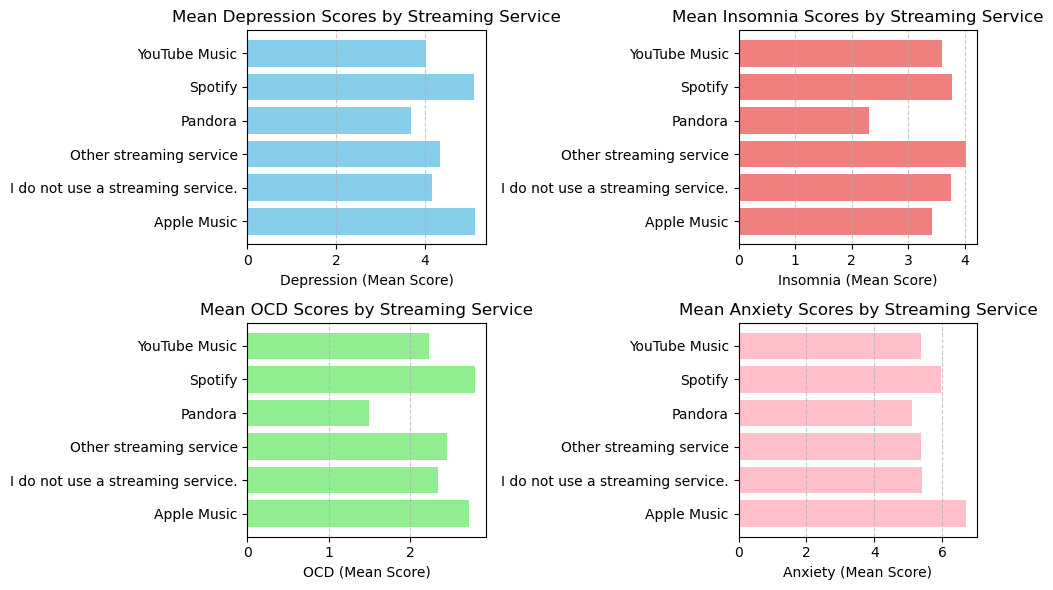

In [60]:
df_grouped = pd.DataFrame(grouped_means)

# Colors for each plot 
colors = ['skyblue', 'lightcoral', 'lightgreen', 'pink']

# Create bar plots for each mental health condition
conditions = ["Depression", "Insomnia", "OCD", "Anxiety"]
plt.figure(figsize=(10, 6))


for i, (condition, color) in enumerate(zip(conditions, colors)):
    # Sort the DataFrame by the current condition in descending order
    sorted_df = grouped_means.sort_values(by=condition, ascending=False)
    plt.subplot(2, 2, i+1)
    plt.barh(df_grouped["Primary streaming service"], df_grouped[condition], color=color)
    plt.xlabel(f'{condition} (Mean Score)')
    plt.title(f'Mean {condition} Scores by Streaming Service')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


General Observations:

Pandora consistently shows the lowest scores across all four mental health conditions—Depression, Anxiety, Insomnia, and OCD. This suggests that Pandora might be associated with better overall mental health outcomes compared to other streaming services.

Spotify and Apple Music are associated with higher scores across most mental health conditions, particularly Anxiety and OCD. This could indicate that these services may be linked to higher levels of mental health issues among their users.

YouTube Music shows high levels of Insomnia and moderately high levels of Depression and Anxiety, suggesting a potential link between using YouTube Music and sleep-related issues as well as general mental health concerns.

Users who do not use any streaming service or use "Other streaming services" tend to have lower scores than Spotify, Apple Music, and YouTube Music but higher than Pandora, placing them in a middle range in terms of mental health outcomes.

Implications:
This analysis might suggest that the type of music streaming service a person uses could be associated with their mental health. However, it's important to remember that correlation does not imply causation. The differences in mental health outcomes could be influenced by various factors, such as the type of content consumed, user demographics, lifestyle, or even the social and cultural context surrounding the use of these services.